In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/train_dataset.pkl')

In [3]:
df.head()

,sedentary_q,sodium_q,potassium_q,caffeine_q,gender,age,active_duty,pulse_regularity,smoke,alcohol,...,salt_add_at_table,salt_add_in_preparation,HBP,BMI,race_mexican_american,race_other_hispanic,race_white,race_black,race_multi_racial,race_asian
14511,1,1.0,1.0,2.0,1,66.0,1,0.0,1.0,1.0,...,0.0,4.0,1,23.0,0.0,0.0,0.0,0.0,0.0,1.0
14513,1,1.0,1.0,5.0,0,71.0,1,0.0,0.0,0.0,...,3.0,4.0,0,23.4,0.0,0.0,0.0,0.0,1.0,0.0
14515,2,5.0,2.0,2.0,0,22.0,0,0.0,0.0,0.0,...,2.0,3.0,0,24.6,0.0,0.0,1.0,0.0,0.0,0.0
14519,2,2.0,1.0,2.0,0,53.0,1,1.0,1.0,0.0,...,2.0,3.0,1,31.9,0.0,0.0,0.0,1.0,0.0,0.0
14521,2,2.0,2.0,1.0,0,20.0,1,0.0,1.0,0.0,...,1.0,3.0,0,26.7,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['sedentary_q', 'sodium_q', 'potassium_q', 'caffeine_q', 'gender', 'age',
       'active_duty', 'pulse_regularity', 'smoke', 'alcohol', 'alcohol_usage',
       'sleep_hour', 'salt_add_at_table', 'salt_add_in_preparation', 'HBP',
       'BMI', 'race_mexican_american', 'race_other_hispanic', 'race_white',
       'race_black', 'race_multi_racial', 'race_asian'],
      dtype='object')

In [5]:
features = ['age', 'gender','alcohol_usage', 'smoke', 'BMI', 'sleep_hour',
            'race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian']
target = 'HBP'

In [6]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
def grid_search_model_results(model, X_test, y_test, model_name): 
    print("Params: ", model.best_params_)
    print("Score: ", model.best_score_)
    
    y_pred = model.predict(X_test)
    
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = round(TP/(TP+FN),2)
    # Specificity or true negative rate
    TNR = round(TN/(TN+FP),2)
    # Precision or positive predictive value
    PPV = round(TP/(TP+FP),2)
    # Negative predictive value
    NPV = round(TN/(TN+FN),2)
    # Fall out or false positive rate
    FPR = round(FP/(FP+TN),2)
    # False negative rate
    FNR = round(FN/(TP+FN),2)
    
    # AUC
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    AUC = round(roc_auc_score(y_test, probs),2)
    
    precision = round(precision_score(y_test, y_pred),2)
    recall = round(recall_score(y_test, y_pred),2)
    f1 = round(f1_score(y_test, y_pred),2)
    acc = round(model.best_score_, 2)
    
    print("{model} : ".format(model=model_name))
    print("----Precision : {precision}".format(precision=precision))
    print("----Recall : {recall}".format(recall=recall))
    print("----F1 : {f1}".format(f1=f1))
    print("----Accurancy : {acc}".format(acc=acc))
    print("----TPR : {TPR}".format(TPR=TPR))
    print("----TNR : {TNR}".format(TNR=TNR))
    print("----PPV : {PPV}".format(PPV=PPV))
    print("----NPV : {NPV}".format(NPV=NPV))
    print("----FPR : {FPR}".format(FPR=FPR))
    print("----FNR : {FNR}".format(FNR=FNR))
    print("----AUC : {AUC}".format(AUC=AUC))
    print('\n')
    
    return [TPR, TNR, PPV, NPV, FPR, FNR, precision, recall, f1, acc, AUC,  model_name]

In [25]:
def get_model_results(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=10)        
    y_pred = model.predict(X_test)
    
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = round(TP/(TP+FN),2)
    # Specificity or true negative rate
    TNR = round(TN/(TN+FP),2)
    # Precision or positive predictive value
    PPV = round(TP/(TP+FP),2)
    # Negative predictive value
    NPV = round(TN/(TN+FN),2)
    # Fall out or false positive rate
    FPR = round(FP/(FP+TN),2)
    # False negative rate
    FNR = round(FN/(TP+FN),2)
    
    # AUC
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    AUC = round(roc_auc_score(y_test, probs),2)
    
    precision = round(precision_score(y_test, y_pred),2)
    recall = round(recall_score(y_test, y_pred),2)
    f1 = round(f1_score(y_test, y_pred),2)
    acc = round(sum(score)/len(score), 2)
    
    print("{model} : ".format(model=model_name))
    print("----Precision : {precision}".format(precision=precision))
    print("----Recall : {recall}".format(recall=recall))
    print("----F1 : {f1}".format(f1=f1))
    print("----Accurancy : {acc}".format(acc=acc))
    print("----TPR : {TPR}".format(TPR=TPR))
    print("----TNR : {TNR}".format(TNR=TNR))
    print("----PPV : {PPV}".format(PPV=PPV))
    print("----NPV : {NPV}".format(NPV=NPV))
    print("----FPR : {FPR}".format(FPR=FPR))
    print("----FNR : {FNR}".format(FNR=FNR))
    print("----AUC : {AUC}".format(AUC=AUC))
    print('\n')
    
    return [TPR, TNR, PPV, NPV, FPR, FNR, precision, recall, f1, acc, AUC,  model_name]

## Hyperparameter Tuning

#### Gradient Boosting Classifier

In [9]:
pipe =  Pipeline([('GradientBoostingClassifier', GradientBoostingClassifier())])
param_grid = {
                  'GradientBoostingClassifier__n_estimators': [5,50,250,500], 
                  'GradientBoostingClassifier__max_depth': [3,5,7,9], 
                  'GradientBoostingClassifier__learning_rate': [0.01,0.1,1,10,100]
             }

gbc_model_grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=10, scoring='roc_auc')
gbc_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('GradientBoostingClassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=10,
             param_grid={'GradientBoostingClassifier__learning_rate': [0.01,
                                                                       0.1, 1,
                                                                       10,
                                                                       100],
                         'GradientBoostingClassifier__max_depth': [3, 5, 7, 9],
                         'GradientBoostingClassifier__n_estimators': [5, 50,
                                                                      250,
                                                                      500]},
             scoring='roc_auc')

#### Logistic Regression

In [10]:
pipe =  Pipeline([('LogisticRegression', LogisticRegression(max_iter = 10000))])

param_grid = {
                  'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                  'LogisticRegression__penalty': ['none', 'l1', 'l2', 'elasticnet'], 
                  'LogisticRegression__C': [100, 10, 1.0, 0.1, 0.01]
             }

lg_model_grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=10, scoring='roc_auc')
lg_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogisticRegression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=10,
             param_grid={'LogisticRegression__C': [100, 10, 1.0, 0.1, 0.01],
                         'LogisticRegression__penalty': ['none', 'l1', 'l2',
                                                         'elasticnet'],
                         'LogisticRegression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']},
             scoring='roc_auc')

#### MLP Classifier

In [11]:
pipe =  Pipeline([('MLPClassifier', MLPClassifier())])

param_grid = {
                    'MLPClassifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    'MLPClassifier__activation': ['tanh', 'relu'],
                    'MLPClassifier__solver': ['sgd', 'adam'],
                    'MLPClassifier__alpha': [0.0001, 0.05],
                    'MLPClassifier__learning_rate': ['constant','adaptive'],
             }

mlp_model_grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=10, scoring='roc_auc')
mlp_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('MLPClassifier', MLPClassifier())]),
             n_jobs=10,
             param_grid={'MLPClassifier__activation': ['tanh', 'relu'],
                         'MLPClassifier__alpha': [0.0001, 0.05],
                         'MLPClassifier__hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                         'MLPClassifier__learning_rate': ['constant',
                                                          'adaptive'],
                         'MLPClassifier__solver': ['sgd', 'adam']},
             scoring='roc_auc')

#### Random Forest Classifier

In [12]:
pipe =  Pipeline([('RandomForestClassifier', RandomForestClassifier())])

param_grid = {
                    'RandomForestClassifier__bootstrap': [True],
                    'RandomForestClassifier__max_depth': [80, 90, 100, 110],
                    'RandomForestClassifier__max_features': [2, 3],
                    'RandomForestClassifier__min_samples_leaf': [3, 4, 5],
                    'RandomForestClassifier__min_samples_split': [8, 10, 12],
                    'RandomForestClassifier__n_estimators': [100, 200, 300, 1000]
             }

rf_model_grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=10, scoring='roc_auc')
rf_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('RandomForestClassifier',
                                        RandomForestClassifier())]),
             n_jobs=10,
             param_grid={'RandomForestClassifier__bootstrap': [True],
                         'RandomForestClassifier__max_depth': [80, 90, 100,
                                                               110],
                         'RandomForestClassifier__max_features': [2, 3],
                         'RandomForestClassifier__min_samples_leaf': [3, 4, 5],
                         'RandomForestClassifier__min_samples_split': [8, 10,
                                                                       12],
                         'RandomForestClassifier__n_estimators': [100, 200, 300,
                                                                  1000]},
             scoring='roc_auc')

In [13]:
models = [
    [lg_model_grid  , "LogisticRegression"]
    ,[rf_model_grid  , "RandomForestClassifier"]
    ,[gbc_model_grid , "GradientBoostingClassifier"]
    ,[mlp_model_grid , "MLPClassifier"]
]

In [16]:
model_results = list(map(lambda x: grid_search_model_results(x[0], X_test, y_test, x[1]), models))

Params:  {'LogisticRegression__C': 0.1, 'LogisticRegression__penalty': 'l2', 'LogisticRegression__solver': 'lbfgs'}
Score:  0.7759626354056188
LogisticRegression : 
----Precision : 0.73
----Recall : 0.73
----F1 : 0.73
----Accurancy : 0.78
----TPR : 0.73
----TNR : 0.71
----PPV : 0.73
----NPV : 0.71
----FPR : 0.29
----FNR : 0.27
----AUC : 0.79


Params:  {'RandomForestClassifier__bootstrap': True, 'RandomForestClassifier__max_depth': 100, 'RandomForestClassifier__max_features': 3, 'RandomForestClassifier__min_samples_leaf': 5, 'RandomForestClassifier__min_samples_split': 12, 'RandomForestClassifier__n_estimators': 1000}
Score:  0.7919103807120598
RandomForestClassifier : 
----Precision : 0.73
----Recall : 0.75
----F1 : 0.74
----Accurancy : 0.79
----TPR : 0.75
----TNR : 0.71
----PPV : 0.73
----NPV : 0.73
----FPR : 0.29
----FNR : 0.25
----AUC : 0.8


Params:  {'GradientBoostingClassifier__learning_rate': 0.01, 'GradientBoostingClassifier__max_depth': 3, 'GradientBoostingClassifier__n_estim

#### Without Hyperparameter Tuning

In [17]:
default_lg_classifier = LogisticRegression()
default_rf_classifier = RandomForestClassifier()
default_gbc_classifier = GradientBoostingClassifier()
default_mlp_classifier = MLPClassifier()

default_models = [
    [default_lg_classifier  , "LogisticRegression"]
    ,[default_rf_classifier  , "RandomForestClassifier"]
    ,[default_gbc_classifier , "GradientBoostingClassifier"]
    ,[default_mlp_classifier , "MLPClassifier"]
]

In [28]:
default_model_results = list(map(lambda x: get_model_results(x[0], X_train, X_test, y_train, y_test, x[1]), default_models))

LogisticRegression : 
----Precision : 0.73
----Recall : 0.72
----F1 : 0.73
----Accurancy : 0.71
----TPR : 0.72
----TNR : 0.72
----PPV : 0.73
----NPV : 0.71
----FPR : 0.28
----FNR : 0.28
----AUC : 0.79


RandomForestClassifier : 
----Precision : 0.71
----Recall : 0.73
----F1 : 0.72
----Accurancy : 0.7
----TPR : 0.73
----TNR : 0.7
----PPV : 0.71
----NPV : 0.71
----FPR : 0.3
----FNR : 0.27
----AUC : 0.78


GradientBoostingClassifier : 
----Precision : 0.73
----Recall : 0.77
----F1 : 0.75
----Accurancy : 0.73
----TPR : 0.77
----TNR : 0.71
----PPV : 0.73
----NPV : 0.74
----FPR : 0.29
----FNR : 0.23
----AUC : 0.81


MLPClassifier : 
----Precision : 0.74
----Recall : 0.72
----F1 : 0.73
----Accurancy : 0.72
----TPR : 0.72
----TNR : 0.73
----PPV : 0.74
----NPV : 0.71
----FPR : 0.27
----FNR : 0.28
----AUC : 0.8




## Model Selection

In [29]:
default_tmp_df = pd.DataFrame(data=['FNR','TPR','FPR','TNR','AUC'], columns=['Metric'])

for model_result in default_model_results:
    default_tmp_df[model_result[11]] = 0
    default_tmp_df.loc[(default_tmp_df['Metric'] == 'FNR'), model_result[11]] = model_result[5]
    default_tmp_df.loc[(default_tmp_df['Metric'] == 'TPR'), model_result[11]] = model_result[0]
    default_tmp_df.loc[(default_tmp_df['Metric'] == 'FPR'), model_result[11]] = model_result[4]
    default_tmp_df.loc[(default_tmp_df['Metric'] == 'TNR'), model_result[11]] = model_result[1]
    default_tmp_df.loc[(default_tmp_df['Metric'] == 'AUC'), model_result[11]] = model_result[10]
default_tmp_df

,Metric,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier
0,FNR,0.28,0.27,0.23,0.28
1,TPR,0.72,0.73,0.77,0.72
2,FPR,0.28,0.30,0.29,0.27
3,TNR,0.72,0.70,0.71,0.73
4,AUC,0.79,0.78,0.81,0.80


In [30]:
tmp_df = pd.DataFrame(data=['FNR','TPR','FPR','TNR','AUC'], columns=['Metric'])

for model_result in model_results:
    tmp_df[model_result[11]] = 0
    tmp_df.loc[(tmp_df['Metric'] == 'FNR'), model_result[11]] = model_result[5]
    tmp_df.loc[(tmp_df['Metric'] == 'TPR'), model_result[11]] = model_result[0]
    tmp_df.loc[(tmp_df['Metric'] == 'FPR'), model_result[11]] = model_result[4]
    tmp_df.loc[(tmp_df['Metric'] == 'TNR'), model_result[11]] = model_result[1]
    tmp_df.loc[(tmp_df['Metric'] == 'AUC'), model_result[11]] = model_result[10]
tmp_df

,Metric,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier,MLPClassifier
0,FNR,0.27,0.25,0.23,0.23
1,TPR,0.73,0.75,0.77,0.77
2,FPR,0.29,0.29,0.29,0.32
3,TNR,0.71,0.71,0.71,0.68
4,AUC,0.79,0.80,0.81,0.81


In [31]:
df_results = pd.DataFrame(data=model_results, columns=['TPR', 'TNR', 'PPV', 'NPV', 'FPR', 'FNR', 'precision', 'recall', 'f1', 'accurancy', 'AUC' ,'model_name'])
df_results

,TPR,TNR,PPV,NPV,FPR,FNR,precision,recall,f1,accurancy,AUC,model_name
0,0.73,0.71,0.73,0.71,0.29,0.27,0.73,0.73,0.73,0.78,0.79,LogisticRegression
1,0.75,0.71,0.73,0.73,0.29,0.25,0.73,0.75,0.74,0.79,0.80,RandomForestClassifier
2,0.77,0.71,0.74,0.75,0.29,0.23,0.74,0.77,0.75,0.80,0.81,GradientBoostingClassifier
3,0.77,0.68,0.72,0.74,0.32,0.23,0.72,0.77,0.74,0.80,0.81,MLPClassifier


In [35]:
df_results_2 = pd.DataFrame(data=default_model_results, columns=['TPR', 'TNR', 'PPV', 'NPV', 'FPR', 'FNR', 'precision', 'recall', 'f1', 'accurancy', 'AUC' ,'model_name'])
df_results_2

,TPR,TNR,PPV,NPV,FPR,FNR,precision,recall,f1,accurancy,AUC,model_name
0,0.72,0.72,0.73,0.71,0.28,0.28,0.73,0.72,0.73,0.71,0.79,LogisticRegression
1,0.73,0.70,0.71,0.71,0.30,0.27,0.71,0.73,0.72,0.70,0.78,RandomForestClassifier
2,0.77,0.71,0.73,0.74,0.29,0.23,0.73,0.77,0.75,0.73,0.81,GradientBoostingClassifier
3,0.72,0.73,0.74,0.71,0.27,0.28,0.74,0.72,0.73,0.72,0.80,MLPClassifier


In [36]:
TPR = df_results[['TPR','model_name']]
TPR = TPR.rename(columns={"TPR": "value"})
TPR['type'] = 'TPR'

TNR = df_results[['TNR','model_name']]
TNR = TNR.rename(columns={"TNR": "value"})
TNR['type'] = 'TNR'

PPV = df_results[['PPV','model_name']]
PPV = PPV.rename(columns={"PPV": "value"})
PPV['type'] = 'PPV'

NPV = df_results[['NPV','model_name']]
NPV = NPV.rename(columns={"NPV": "value"})
NPV['type'] = 'NPV'

FPR = df_results[['FPR','model_name']]
FPR = FPR.rename(columns={"FPR": "value"})
FPR['type'] = 'FPR'

FNR = df_results[['FNR','model_name']]
FNR = FNR.rename(columns={"FNR": "value"})
FNR['type'] = 'FNR'

precision = df_results[['precision','model_name']]
precision = precision.rename(columns={"precision": "value"})
precision['type'] = 'Precision'

recall = df_results[['recall','model_name']]
recall = recall.rename(columns={"recall": "value"})
recall['type'] = 'Recall'

f1 = df_results[['f1','model_name']]
f1 = f1.rename(columns={"f1": "value"})
f1['type'] = 'F1'

accurancy = df_results[['accurancy','model_name']]
accurancy = accurancy.rename(columns={"accurancy": "value"})
accurancy['type'] = 'Accurancy'

AUC = df_results[['AUC','model_name']]
AUC = accurancy.rename(columns={"AUC": "value"})
AUC['type'] = 'AUC'

combine = pd.concat([TPR, TNR, PPV, NPV, FPR, FNR, precision, recall, f1, accurancy, AUC])
combine['group'] = 'Hyperparameter Tuning'
combine.head()

,value,model_name,type,group
0,0.73,LogisticRegression,TPR,Hyperparameter Tuning
1,0.75,RandomForestClassifier,TPR,Hyperparameter Tuning
2,0.77,GradientBoostingClassifier,TPR,Hyperparameter Tuning
3,0.77,MLPClassifier,TPR,Hyperparameter Tuning
0,0.71,LogisticRegression,TNR,Hyperparameter Tuning


In [37]:
TPR = df_results_2[['TPR','model_name']]
TPR = TPR.rename(columns={"TPR": "value"})
TPR['type'] = 'TPR'

TNR = df_results_2[['TNR','model_name']]
TNR = TNR.rename(columns={"TNR": "value"})
TNR['type'] = 'TNR'

PPV = df_results_2[['PPV','model_name']]
PPV = PPV.rename(columns={"PPV": "value"})
PPV['type'] = 'PPV'

NPV = df_results_2[['NPV','model_name']]
NPV = NPV.rename(columns={"NPV": "value"})
NPV['type'] = 'NPV'

FPR = df_results_2[['FPR','model_name']]
FPR = FPR.rename(columns={"FPR": "value"})
FPR['type'] = 'FPR'

FNR = df_results_2[['FNR','model_name']]
FNR = FNR.rename(columns={"FNR": "value"})
FNR['type'] = 'FNR'

precision = df_results_2[['precision','model_name']]
precision = precision.rename(columns={"precision": "value"})
precision['type'] = 'Precision'

recall = df_results_2[['recall','model_name']]
recall = recall.rename(columns={"recall": "value"})
recall['type'] = 'Recall'

f1 = df_results_2[['f1','model_name']]
f1 = f1.rename(columns={"f1": "value"})
f1['type'] = 'F1'

accurancy = df_results_2[['accurancy','model_name']]
accurancy = accurancy.rename(columns={"accurancy": "value"})
accurancy['type'] = 'Accurancy'

AUC = df_results_2[['AUC','model_name']]
AUC = accurancy.rename(columns={"AUC": "value"})
AUC['type'] = 'AUC'

combine_2 = pd.concat([TPR, TNR, PPV, NPV, FPR, FNR, precision, recall, f1, accurancy, AUC])
combine_2['group'] = 'Default'
combine_2.head()

,value,model_name,type,group
0,0.72,LogisticRegression,TPR,Default
1,0.73,RandomForestClassifier,TPR,Default
2,0.77,GradientBoostingClassifier,TPR,Default
3,0.72,MLPClassifier,TPR,Default
0,0.72,LogisticRegression,TNR,Default


In [38]:
combine = combine[(combine['type'] == 'FNR') | \
                    (combine['type'] == 'TPR') | \
                    (combine['type'] == 'FPR') | \
                    (combine['type'] == 'TNR') | \
                    (combine['type'] == 'AUC')
                 ]

Text(0, 0.5, 'Score')

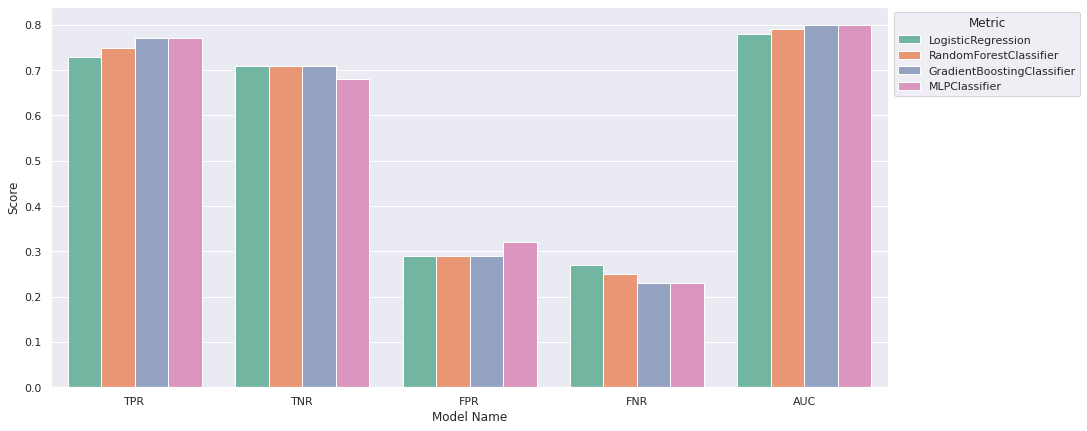

In [39]:
sns.set(color_codes=False)
plt.figure(figsize=(15,7))
#sort = results.sort_values(by='f1', ascending=False).model_name.values
ax = sns.barplot(data=combine, x='type', y='value',  palette='Set2', hue='model_name')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Metric", loc='upper left',bbox_to_anchor = (1,1))
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel("Model Name")
ax.set_ylabel("Score")

In [41]:
compare = pd.concat([combine, combine_2])
compare = compare[compare['type']=='FNR']
compare

,value,model_name,type,group
0,0.27,LogisticRegression,FNR,Hyperparameter Tuning
1,0.25,RandomForestClassifier,FNR,Hyperparameter Tuning
2,0.23,GradientBoostingClassifier,FNR,Hyperparameter Tuning
3,0.23,MLPClassifier,FNR,Hyperparameter Tuning
0,0.28,LogisticRegression,FNR,Default
1,0.27,RandomForestClassifier,FNR,Default
2,0.23,GradientBoostingClassifier,FNR,Default
3,0.28,MLPClassifier,FNR,Default


Text(0, 0.5, 'False Negative Rate')

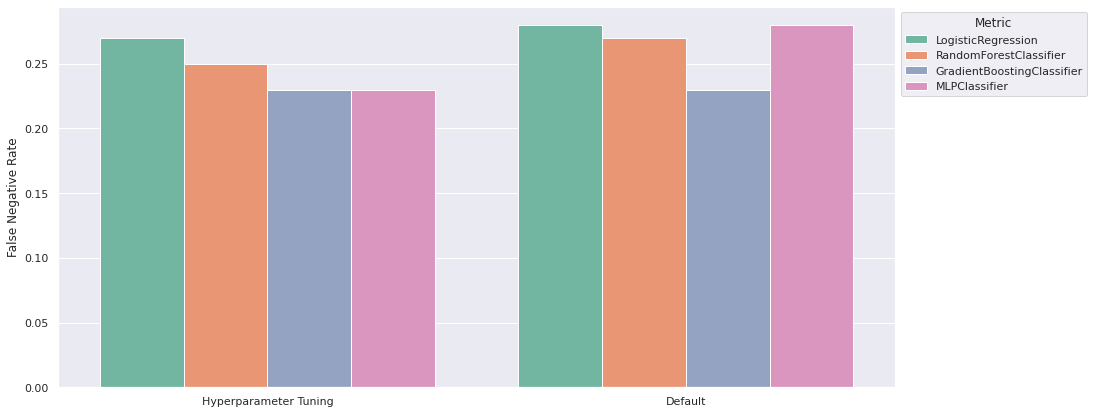

In [43]:
sns.set(color_codes=False)
plt.figure(figsize=(15,7))
#sort = results.sort_values(by='f1', ascending=False).model_name.values
ax = sns.barplot(data=compare, x='group', y='value',  palette='Set2', hue='model_name')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Metric", loc='upper left',bbox_to_anchor = (1,1))
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel("")
ax.set_ylabel("False Negative Rate")

In [44]:
joblib.dump(gbc_model_grid, '/dsa/groups/capstonesp2022/on-campus/group_1/data/model.pkl')

['/dsa/groups/capstonesp2022/on-campus/group_1/data/model.pkl']